## **Project Name:** Gasolinne Price Forecasting  using Tensor Flow and Auto Keras

## Gasoline Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

### In this project we will try to forecast the different gasoline prices for the upcoming dates given to us. 

### We will use LSTM and ARIMA forecasting models to predict the prices then we will see how we can implement the same using Auto Keras, which is an Auto ML Library.

## Pipeline of the project:
- Data Analysis
- Model Building and predictions using ML techniques
- Model Building and prediction using Auto Keras(Auto ML)

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [4]:
data = pd.read_csv("C:/Programming Practice Notebooks/PROJECTS/Gasoline Price Forecasting/train_data.csv")
data.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis and splitting the data**

In [10]:
data.head()
data.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [11]:
df = data.dropna()

In [12]:
df.rename(columns={"Gasoline (USD)": "Gasoline"}, inplace = True)
df.head()

C:\Users\prabhjyoth.mattummal\AppData\Local\Temp\ipykernel_14704\3178545418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Petrol (USD)": "Gasoline"}, inplace = True)


,Date,Gasoline
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


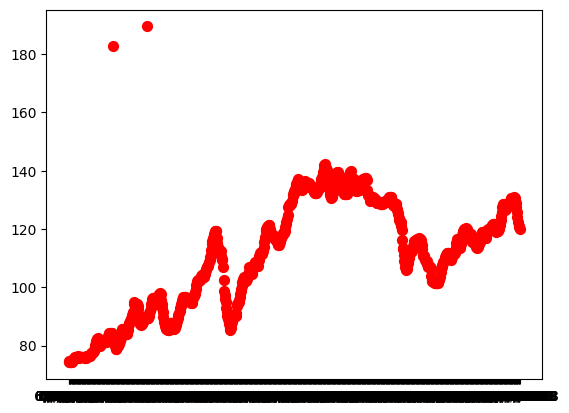

In [13]:
plt.scatter(df.Date, df.Gasoline,color='red',label='Prices', s=50)

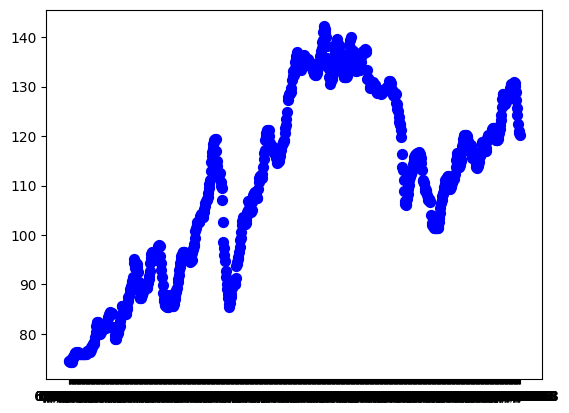

In [14]:
df2=df[df.Gasoline<160]
plt.scatter(df2.Date, df2.Gasoline,color='blue',label='Prices', s=50)


In [15]:
df3=df2.reset_index()['Gasoline']
df3.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Gasoline, dtype: float64

LSTM models are sensitive to the scale of the data, so we need to transform the data to be in the range [0, 1] using MinMaxScaler.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))

Train-Test Split

In [18]:
training_size = int(len(df3)*0.65)    # 65% of the training data

test_size = len(df3) - training_size

train_data, test_data = df3[0:training_size,:], df3[training_size:len(df3),:1]

In [19]:
train_data.shape
test_data.shape

(284, 1)

**Data Preprocessing**

In [ ]:
 import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
print(X_train.shape), print(y_train.shape)

# LSTM 

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

In [ ]:
model.save("prtrol price prediction")

## **Using ARIMA**

In [ ]:
!pip install --upgrade patsy

In [ ]:
!pip install statsmodels

In [ ]:
!pip install --upgrade --no-deps statsmodels

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/train_data.csv")
df.head()

In [ ]:
df.rename(columns={"Gasoline (USD)": "Gasoline"}, inplace = True)
df.head()

In [ ]:
df2 = df.dropna()
df3=df2[df2.Gasoline<160]
df3.head()


In [ ]:
df4=df3.reset_index()['Gasoline']
df4.head()

In [ ]:
model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

# Using Auto ML

 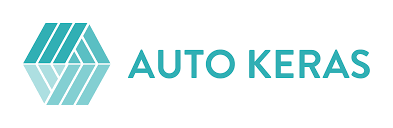

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


In [ ]:
!pip install autokeras

In [ ]:
!pip show autokeras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [ ]:
reg.fit(x=X_train, y=y_train, verbose=0)

In [ ]:

# evaluate the model
mae, _  = reg.evaluate(X_test, ytest, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(X_test)

# get the best performing model
model = reg.export_model()


In [ ]:
# summarize the loaded model
model.summary()

In [ ]:
yhat_train= reg.predict(X_train)

In [ ]:
train_predict=scaler.inverse_transform(yhat_train)
test_predict=scaler.inverse_transform(yhat_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest,yhat_test)

In [ ]:
mean_squared_error(y_train,yhat_train)